In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Домашнее задание №3

Решенный ноутбук нужно загрузить в [форму](http://bit.ly/dafe_hw)  
Дедлайн: __22.05.2019__

## Загрузка данных (5%)

In [2]:
lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50, 
    resize=0.4,
)

Выведите:
- кол-во объектов
- Кол-во признаков
- кол-во классов
- посмотрите, сколько изображений соответствет каждому классу
- Отрисуйте изображения для случайных семплов с подписями имен класса 

In [3]:
# Ваш код здесь
n_obj, h, w = lfw_people.images.shape
print("кол-во объектов", n_obj)
print("Кол-во признаков", lfw_people.data.shape[1])
num_classes  = lfw_people.target_names.shape[0]
print("кол-во классов", lfw_people.target_names.shape[0])
print("сколько изображений соответствет каждому классу", np.unique(lfw_people.target, return_counts = True)[1])

кол-во объектов 1560
Кол-во признаков 1850
кол-во классов 12
сколько изображений соответствет каждому классу [ 77 236 121 530 109  71  52  55  53  60  52 144]


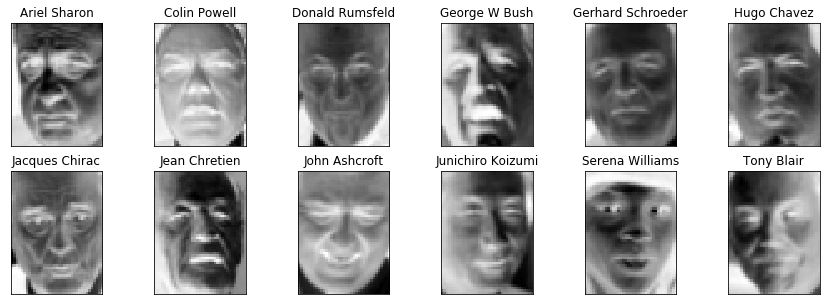

In [4]:
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 6, 1 + i, xticks=[], yticks=[])
    idx = np.where(lfw_people.target[:]==i)[0]
    features_idx = lfw_people.images[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(lfw_people.target_names[i])
    plt.imshow(im, cmap='gray_r')
plt.show()

## Пора учить нейронки! (5%) 

In [5]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout 
from keras.utils import np_utils
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
# Конечно мы сначала должны нормировать и центрировать данные: 

x = (lfw_people.images/255)*2-1
y = lfw_people.target

# используйте lfw_people.target и lfw_people.images

In [7]:
# Разделим данные на трейн/валидацию/тест: 
x_train, x_test, y_train_cat, y_test_cat = train_test_split(x, y, train_size=0.6, test_size=0.4, random_state=42)
x_val, x_test, y_val_cat, y_test_cat = train_test_split(x_test, y_test_cat, train_size=0.5, test_size=0.5, random_state=42)

# Cделайте one-hot-encoding для целевой переменной

y_train = np_utils.to_categorical(y_train_cat, num_classes=num_classes)
y_test = np_utils.to_categorical(y_test_cat, num_classes=num_classes)
y_val = np_utils.to_categorical(y_val_cat, num_classes=num_classes)

## Fully connected neural network (20%)
Создадим нашу первую модель, будем использовать полносвязную нейронную сеть 
- Первый слой (входной): 64 нейрона, функция активации ReLU
- Скрытый слой: 32 нейрона, функция активации ReLU
- Чтобы наша сеть не переобучалась, после каждого полно-связного используйте слой Dropout с параметром rate = 0.4
- Выходной слой: на ваше усмотрение :) 

Будем обучать с помощью Adam на 100 эпохах,  размер сэмпла для минибатча: 10

Учимся на train, валидируем на val

In [8]:
# Ваш код здесь

model = Sequential()
model.add(Flatten(input_shape=x[0].shape))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(12))
model.add(Activation('softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.fit(x_train, y_train,
              batch_size=10,
              epochs=100,
              validation_data=(x_val, y_val),
              shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 936 samples, validate on 312 samples
Epoch 1/100
936/936 [==============================] - 1s 1ms/step - loss: 2.2959 - acc: 0.2714 - val_loss: 1.8917 - val_acc: 0.4167
Epoch 2/100
936/936 [==============================] - 0s 267us/step - loss: 1.9617 - acc: 0.3857 - val_loss: 1.7162 - val_acc: 0.4519
Epoch 3/100
936/936 [==============================] - 0s 263us/step - loss: 1.8610 - acc: 0.3985 - val_loss: 1.6155 - val_acc: 0.4776
Epoch 4/100
936/936 [==============================] - 0s 278us/step - loss: 1.7528 - acc: 0.4038 - val_loss: 1.4982 - val_acc: 0.5160
Epoch 5/100
936/936 [==============================] - 0s 264us/step - loss: 1.6876 - acc: 0.4348 - val_loss: 1.4351 - val_acc: 0.5385
Epoch 6/100
936/936 [==============================] - 0s 265us/step - loss: 1.5407 - acc: 0.4915 - val_loss: 1.3388 - val_acc: 0.6154
Epoch 7/100
936/936 [==============================] - 0s 263us/step - loss: 1.4135 - acc: 0.5107 

Epoch 59/100
936/936 [==============================] - 0s 259us/step - loss: 0.3354 - acc: 0.8835 - val_loss: 0.9896 - val_acc: 0.8045
Epoch 60/100
936/936 [==============================] - 0s 259us/step - loss: 0.3114 - acc: 0.9135 - val_loss: 0.9895 - val_acc: 0.8045
Epoch 61/100
936/936 [==============================] - 0s 259us/step - loss: 0.3297 - acc: 0.8910 - val_loss: 1.0066 - val_acc: 0.7949
Epoch 62/100
936/936 [==============================] - 0s 260us/step - loss: 0.3635 - acc: 0.8889 - val_loss: 1.0273 - val_acc: 0.7981
Epoch 63/100
936/936 [==============================] - 0s 261us/step - loss: 0.3298 - acc: 0.8846 - val_loss: 1.0204 - val_acc: 0.8077
Epoch 64/100
936/936 [==============================] - 0s 261us/step - loss: 0.3190 - acc: 0.9006 - val_loss: 1.0104 - val_acc: 0.8077
Epoch 65/100
936/936 [==============================] - 0s 260us/step - loss: 0.3677 - acc: 0.8868 - val_loss: 0.9704 - val_acc: 0.8173
Epoch 66/100
936/936 [==========================

Постройте confusion_matrix (используйте sklearn) на тестовой выборке (test) и посчитайте долю правильных ответов(test)

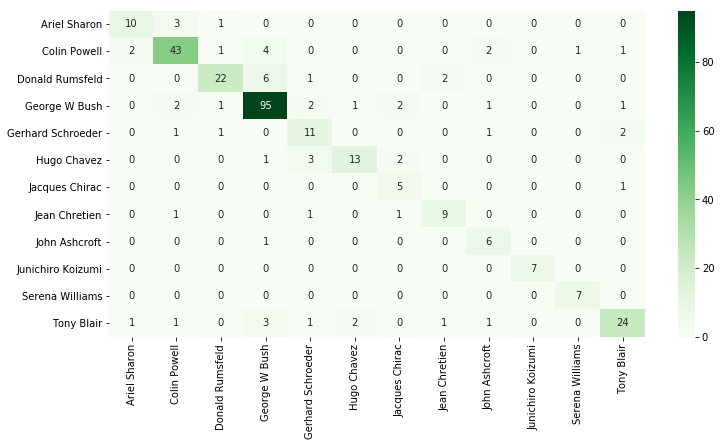

In [10]:
y_pred = model.predict(x_test)
_y_pred = np.argmax(y_pred, axis = 1)
_y_test = np.argmax(y_test, axis = 1)

confusionmatrix = confusion_matrix(_y_pred, _y_test)
# Ваш код здесь

plt.figure(figsize=(12, 6))
sns.heatmap(confusionmatrix, cmap='Greens', annot=True,
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)
plt.show()

Оцените, кого с кем вы чаще всего путаете? Почему одних людей наша сеть путает с другими чаще?

Вспомним, что в нашей задачи классы, не сбалансированы, какая получится доля правильных ответов, если мы всегда будем предсказывать константнам значением: George W Bush

In [11]:
# Ваш код здесь
# 1) Сетка переобучается под буша, тк его больше всего
# 2) Если предположить, что состав тестовой выборки будет такой же, как и у всего датасета, то:
arr = np.array([ 77 ,236, 121 ,530 ,109,  71 , 52 , 55 ,53 , 60 , 52 ,144])
print(530/np.sum(arr))



0.33974358974358976


## Это же картинки! Попробуем Convolution neural network (30%)

- Используйте два сверточных слоя (по 16 нейронов с функцией активации ReLu, padding='same')
- Затем слой MaxPooling'a с размерром 2х2
- Затем полносвязные слои: 32 нейрона и 16 нейронов
- Выходной слой как раньше 

Помните о требованиях свертки к размерности входных данных и используйте `.reshape`

In [12]:
# Ваш код здесь

x_train_conv = x_train.reshape(x_train.shape[0], 50, 37, 1)
x_val_conv = x_val.reshape(y_val.shape[0], 50, 37, 1)

model_conv = Sequential()
model_conv.add(Conv2D(16, (3, 3), input_shape=(50, 37, 1), padding='same', activation='relu'))
model_conv.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_conv.add(Flatten())
model_conv.add(Dense(32, activation='relu'))
model_conv.add(Dense(16, activation='relu'))
model_conv.add(Dense(num_classes, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                118464    
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
__________

In [13]:
# Обучаем модель! 
history_pic = model_conv.fit(x_train_conv, y_train,
              batch_size=10,
              epochs=20,
              validation_data=(x_val_conv, y_val),
              shuffle=True)

Train on 936 samples, validate on 312 samples
Epoch 1/20
936/936 [==============================] - 2s 2ms/step - loss: 2.1380 - acc: 0.3269 - val_loss: 1.9164 - val_acc: 0.3462
Epoch 2/20
936/936 [==============================] - 1s 671us/step - loss: 1.7476 - acc: 0.4028 - val_loss: 1.6138 - val_acc: 0.4519
Epoch 3/20
936/936 [==============================] - 1s 673us/step - loss: 1.4127 - acc: 0.5203 - val_loss: 1.3468 - val_acc: 0.5545
Epoch 4/20
936/936 [==============================] - 1s 671us/step - loss: 1.0595 - acc: 0.6699 - val_loss: 1.0923 - val_acc: 0.6378
Epoch 5/20
936/936 [==============================] - 1s 676us/step - loss: 0.7008 - acc: 0.7607 - val_loss: 1.0357 - val_acc: 0.6955
Epoch 6/20
936/936 [==============================] - 1s 683us/step - loss: 0.5314 - acc: 0.8355 - val_loss: 1.0529 - val_acc: 0.6891
Epoch 7/20
936/936 [==============================] - 1s 684us/step - loss: 0.3407 - acc: 0.8846 - val_loss: 1.0221 - val_acc: 0.7532
Epoch 8/20
936/936

Постройте confusion_matrix (используйте sklearn) на тестовой выборке (test) и посчитайте долю правильных ответов(test)

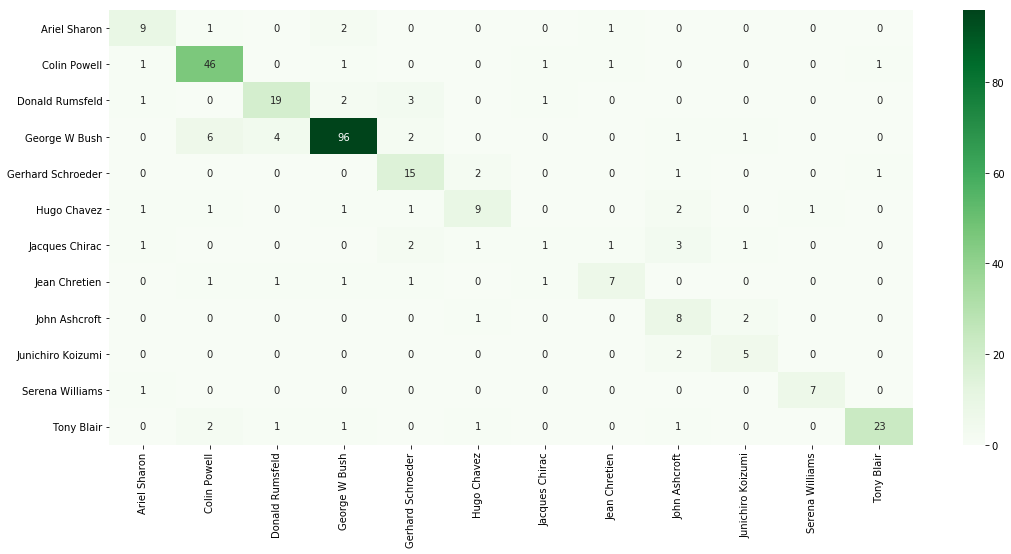

In [15]:
x_test_conv = x_test.reshape(x_test.shape[0], 50, 37, 1)
y_pred_conv = model_conv.predict(x_test_conv)
_y_pred_conv = np.argmax(y_pred_conv, axis = 1)
_y_test_conv = np.argmax(y_test, axis = 1)

confusionmatrix = confusion_matrix(_y_test_conv,_y_pred_conv) # Ваш код здесь

plt.figure(figsize=(18, 8))
sns.heatmap(confusionmatrix, cmap='Greens', annot=True,
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)
plt.show()

Кажется, что стало лучше, но постройте график зависимости доли правильных ответов от эпохи на обучении и валидации. Какие выводы можно сделать?  

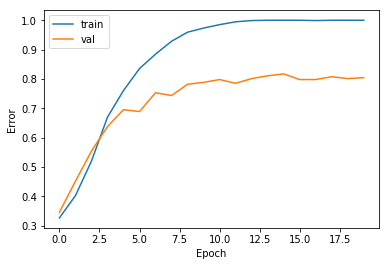

In [16]:
plt.plot(history_pic.history['acc'], label='train')
plt.plot(history_pic.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

### Ваши ответы здесь
модель сильно переобучается

## Aугментация дынных (40%)
Вспомним, что для борьбы с переобучением, нам может помочь Aугментация, для этого мы будем использовать стандартные возможности Keras. Загляните в [доку](https://keras.io/preprocessing/image/) или в эту [статью](https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085) 

Вы можете использовать любые аугментации

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# Ваш код здесь
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                             rotation_range=30)

In [20]:
datagen.fit(x_train[:,:,:,None])

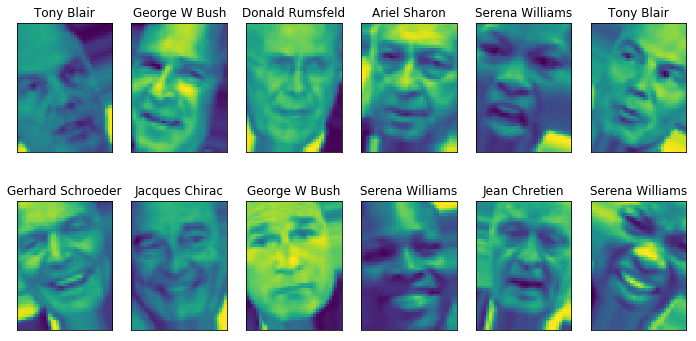

In [21]:
fig = plt.figure(figsize=(12,6))

for x_batch, y_batch in datagen.flow(x_train[:,:,:,None], y_train_cat, batch_size=12):
    for i in range(12):
        ax = fig.add_subplot(2, 6, 1 + i, xticks=[], yticks=[])
        ax.set_title(lfw_people.target_names[y_batch[i]])
        plt.imshow(x_batch[i][:,:,0])
    plt.show()
    break

In [22]:
history = model_conv.fit_generator(datagen.flow(x_train[:,:,:,None], y_train, batch_size=10),
                                      steps_per_epoch=len(x_train), verbose=1,
                                      epochs=5,
                                      validation_data=(x_val[:,:,:,None], y_val))

Epoch 1/5
936/936 [==============================] - 6s 6ms/step - loss: 1.7152 - acc: 0.4585 - val_loss: 0.8798 - val_acc: 0.7436
Epoch 2/5
936/936 [==============================] - 6s 6ms/step - loss: 1.1185 - acc: 0.6401 - val_loss: 0.7151 - val_acc: 0.7692
Epoch 3/5
936/936 [==============================] - 6s 6ms/step - loss: 0.8568 - acc: 0.7281 - val_loss: 0.6846 - val_acc: 0.7949
Epoch 4/5
936/936 [==============================] - 6s 6ms/step - loss: 0.6879 - acc: 0.7753 - val_loss: 0.6494 - val_acc: 0.7949
Epoch 5/5
936/936 [==============================] - 6s 6ms/step - loss: 0.5841 - acc: 0.8133 - val_loss: 0.6072 - val_acc: 0.8301


In [23]:
y_predict = model.predict(x_test)
y_predict_classes = model.predict_classes(x_test)

print('Accuracy score: ', accuracy_score(y_test_cat, y_predict_classes ))

Accuracy score:  0.8076923076923077


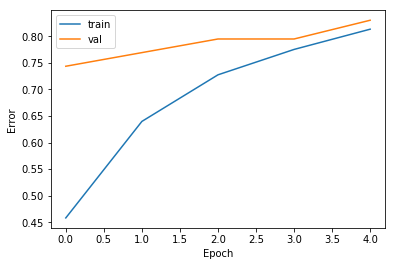

In [24]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

Посмотрите долю правильных ответов на тестовой выборке и постройте график зависимости от эпох для обучения и валидации
Ответьте на вопросы и объясните свой ответ: 
- Удалось ли Вам победить переобучение? 
    вроде да
- Будет ли полезна аугментация horizontal_flip?
    нет, тк лица не симметричные


### Ваши ответы здесь

## Дополнительное задание (дополнительные +30%) 
Обучите такую нейронную сеть, чтобы на тестовой выборке достичь доли правильных ответов больше 92%

In [25]:
# Ваш код здесь
from keras.layers import BatchNormalization
from keras.constraints import maxnorm

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 37, 1), padding='same', activation='relu', 
                  kernel_constraint=maxnorm(3)) )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)) )
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)) )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding='valid', activation='relu', kernel_constraint=maxnorm(3)) )
model.add(Conv2D(64, (2, 2), padding='valid', activation='relu', kernel_constraint=maxnorm(3)) )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 37, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 18, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 18, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 18, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 9, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 5, 64)          102464    
__________

In [26]:
datagen = ImageDataGenerator(width_shift_range=0.15, height_shift_range=0.15,
                             rotation_range=25)
datagen.fit(x_train[:,:,:,None])
history = model.fit_generator(datagen.flow(x_train[:,:,:,None], y_train, batch_size=15), 
                              samples_per_epoch=len(x_train), epochs=100, 
                              validation_data=(x_val[:,:,:,None], y_val),
                              shuffle=True)

c:\users\user\.conda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=100, validation_data=(array([[[..., shuffle=True, steps_per_epoch=62)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
62/62 [==============================] - 4s 72ms/step - loss: 2.6860 - acc: 0.1484 - val_loss: 3.3517 - val_acc: 0.1795
Epoch 2/100
62/62 [==============================] - 1s 23ms/step - loss: 2.2747 - acc: 0.2935 - val_loss: 3.0634 - val_acc: 0.1827
Epoch 3/100
62/62 [==============================] - 1s 23ms/step - loss: 2.0841 - acc: 0.3586 - val_loss: 2.8761 - val_acc: 0.2596
Epoch 4/100
62/62 [==============================] - 1s 23ms/step - loss: 1.9503 - acc: 0.3801 - val_loss: 1.8540 - val_acc: 0.4327
Epoch 5/100
62/62 [==============================] - 1s 23ms/step - loss: 1.7973 - acc: 0.4435 - val_loss: 1.6191 - val_acc: 0.5449
Epoch 6/100
62/62 [==============================] - 1s 23ms/step - loss: 1.7554 - acc: 0.4500 - val_loss: 2.1888 - val_acc: 0.3846
Epoch 7/100
62/62 [==============================] - 1s 23ms/step - loss: 1.6349 - acc: 0.4963 - val_loss: 1.4503 - val_acc: 0.5577
Epoch 8/100
62/62 [==============================] - 1s 23ms/step - loss: 1.

62/62 [==============================] - 1s 23ms/step - loss: 0.2165 - acc: 0.9317 - val_loss: 0.4124 - val_acc: 0.8654
Epoch 63/100
62/62 [==============================] - 1s 24ms/step - loss: 0.2690 - acc: 0.9188 - val_loss: 0.3426 - val_acc: 0.8846
Epoch 64/100
62/62 [==============================] - 1s 23ms/step - loss: 0.2659 - acc: 0.9172 - val_loss: 0.3683 - val_acc: 0.8846
Epoch 65/100
62/62 [==============================] - 1s 23ms/step - loss: 0.1938 - acc: 0.9355 - val_loss: 0.3229 - val_acc: 0.8782
Epoch 66/100
62/62 [==============================] - 1s 23ms/step - loss: 0.2057 - acc: 0.9333 - val_loss: 0.5796 - val_acc: 0.8333
Epoch 67/100
62/62 [==============================] - 1s 23ms/step - loss: 0.1879 - acc: 0.9441 - val_loss: 0.3453 - val_acc: 0.8974
Epoch 68/100
62/62 [==============================] - 1s 23ms/step - loss: 0.1712 - acc: 0.9366 - val_loss: 0.2493 - val_acc: 0.9391
Epoch 69/100
62/62 [==============================] - 1s 23ms/step - loss: 0.1731 

In [27]:
y_predict = model.predict(x_test[:,:,:,None])
y_predict_classes = model.predict_classes(x_test[:,:,:,None])
print('Accuracy score: ', accuracy_score(y_test_cat, y_predict_classes ))

Accuracy score:  0.9294871794871795


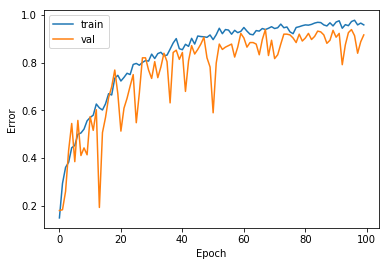

In [28]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

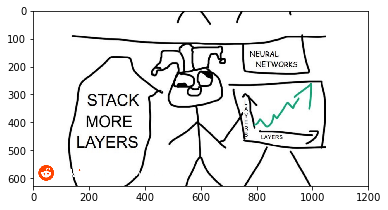

In [30]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('n9fgba8b0qr01.png', 'r')
imshow(np.asarray(pil_im));